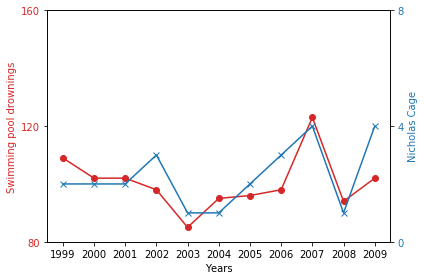

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# initialize data
movies    = np.array([2, 2, 2, 3, 1, 1, 2, 3, 4, 1, 4])
years     = np.array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])
drownings = np.array([109, 102, 102, 98, 85, 95, 96, 98, 123, 94, 102])

fig, ax1 = plt.subplots()

# plot swimming pool drownings
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Swimming pool drownings', color=color)
ax1.plot(years, drownings, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks((80, 120 , 160))

# plot nicholas cage moview
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Nicholas Cage', color=color)  # we already handled the x-label with ax1
ax2.plot(years, movies, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks((0, 4 , 8))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(np.arange(min(years), max(years)+1, 1.0))

plt.show()


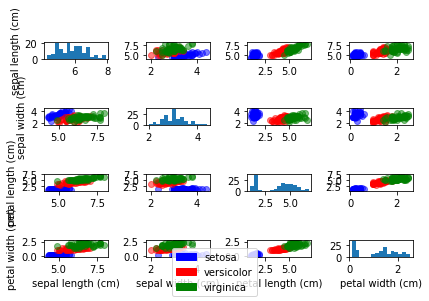

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import requests

# retrieves the iris dataset from a github repo using requests
def getIrisData():
    url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
    response = requests.get(url, timeout=5)
    data = response.text.split("\n")
    del data[0]
    data.pop()

    list = []

    for row in data:
        list.append(getDict(row))

    orgData = {
        "setosa": {
            "sepal_length": [],
            "sepal_width": [],
            "petal_length": [],
            "petal_width": []
        },
        "versicolor": {
            "sepal_length": [],
            "sepal_width": [],
            "petal_length": [],
            "petal_width": []
        },
        "virginica": {
            "sepal_length": [],
            "sepal_width": [],
            "petal_length": [],
            "petal_width": []
        },
    }

    for row in list:
        if row['species'] == 'setosa':
            orgData['setosa']['sepal_length'].append(row['sepal_length'])
            orgData['setosa']['sepal_width'].append(row['sepal_width'])
            orgData['setosa']['petal_length'].append(row['petal_length'])
            orgData['setosa']['petal_width'].append(row['petal_width'])

        elif row['species'] == 'versicolor':
            orgData['versicolor']['sepal_length'].append(row['sepal_length'])
            orgData['versicolor']['sepal_width'].append(row['sepal_width'])
            orgData['versicolor']['petal_length'].append(row['petal_length'])
            orgData['versicolor']['petal_width'].append(row['petal_width'])

        else:
            orgData['virginica']['sepal_length'].append(row['sepal_length'])
            orgData['virginica']['sepal_width'].append(row['sepal_width'])
            orgData['virginica']['petal_length'].append(row['petal_length'])
            orgData['virginica']['petal_width'].append(row['petal_width'])

    return orgData

# returns a dictionary of a dataset row
def getDict(row):
    row = row.split(",")
    thisdict = {
        "sepal_length": float(row[0]),
        "sepal_width" : float(row[1]),
        "petal_length": float(row[2]),
        "petal_width" : float(row[3]),
        "species"     : row[4]
    }

    return thisdict

# return a list of all sepal lengths
def getSepalLengths(data):
    lengths = []

    for length in data['setosa']['sepal_length']:
        lengths.append(length)
    for length in data['versicolor']['sepal_length']:
        lengths.append(length)
    for length in data['virginica']['sepal_length']:
        lengths.append(length)

    return lengths

# return a list of all sepal widths
def getSepalWidths(data, species = 'all'):
    lengths = []

    for length in data['setosa']['sepal_width']:
        lengths.append(length)
    for length in data['versicolor']['sepal_width']:
        lengths.append(length)
    for length in data['virginica']['sepal_width']:
        lengths.append(length)

    return lengths

# return a list of all petal lengths
def getPetalLengths(data, species = 'all'):
    lengths = []

    for length in data['setosa']['petal_length']:
        lengths.append(length)
    for length in data['versicolor']['petal_length']:
        lengths.append(length)
    for length in data['virginica']['petal_length']:
        lengths.append(length)

    return lengths

# return a list of all sepal widths
def getPetalWidths(data, species = 'all'):
    lengths = []

    for length in data['setosa']['petal_width']:
        lengths.append(length)
    for length in data['versicolor']['petal_width']:
        lengths.append(length)
    for length in data['virginica']['petal_width']:
        lengths.append(length)

    return lengths

# add a subplot to the plot
def scatter(axs, x1, y1, x2, y2, x3, y3):
    axs.scatter(np.array(x1), np.array(y1), c='blue', label='setosa', alpha=0.5)
    axs.scatter(np.array(x2), np.array(y2), c='red', label='setosa', alpha=0.5)
    axs.scatter(np.array(x3), np.array(y3), c='green', label='setosa', alpha=0.5)

# sets all the axis labels with corresponding titles
def setAxisLabels(axs):
    # y axis labels
    axs[0,0].set(ylabel='sepal length (cm)')
    axs[1,0].set(ylabel='sepal width (cm)')
    axs[2,0].set(ylabel='petal length (cm)')
    axs[3,0].set(ylabel='petal width (cm)')

    # x axis labels
    axs[3,0].set(xlabel='sepal length (cm)')
    axs[3,1].set(xlabel='sepal width (cm)')
    axs[3,2].set(xlabel='petal length (cm)')
    axs[3,3].set(xlabel='petal width (cm)')

#################################################################################################
# MAIN

data = getIrisData()
fig, axs = plt.subplots(4, 4)

# plot subplot [0, 1]
scatter(
    axs[0, 1],
    data['setosa']['sepal_width'],
    data['setosa']['sepal_length'],
    data['versicolor']['sepal_width'],
    data['versicolor']['sepal_length'],
    data['virginica']['sepal_width'],
    data['virginica']['sepal_length']
)

# plot subplot [0, 2]
scatter(
    axs[0, 2],
    data['setosa']['petal_length'],
    data['setosa']['sepal_length'],
    data['versicolor']['petal_length'],
    data['versicolor']['sepal_length'],
    data['virginica']['petal_length'],
    data['virginica']['sepal_length']
)

# plot subplot [0, 3]
scatter(
    axs[0, 3],
    data['setosa']['petal_width'],
    data['setosa']['sepal_length'],
    data['versicolor']['petal_width'],
    data['versicolor']['sepal_length'],
    data['virginica']['petal_width'],
    data['virginica']['sepal_length']
)


# plot subplot [1, 0]
scatter(
    axs[1, 0],
    data['setosa']['sepal_length'],
    data['setosa']['sepal_width'],
    data['versicolor']['sepal_length'],
    data['versicolor']['sepal_width'],
    data['virginica']['sepal_length'],
    data['virginica']['sepal_width']
)

# plot subplot [1, 2]
scatter(
    axs[1, 2],
    data['setosa']['petal_length'],
    data['setosa']['sepal_width'],
    data['versicolor']['petal_length'],
    data['versicolor']['sepal_width'],
    data['virginica']['petal_length'],
    data['virginica']['sepal_width']
)

# plot subplot [1, 3]
scatter(
    axs[1, 3],
    data['setosa']['petal_width'],
    data['setosa']['sepal_width'],
    data['versicolor']['petal_width'],
    data['versicolor']['sepal_width'],
    data['virginica']['petal_width'],
    data['virginica']['sepal_width']
)


# plot subplot [2, 0]
scatter(
    axs[2, 0],
    data['setosa']['sepal_length'],
    data['setosa']['petal_length'],
    data['versicolor']['sepal_length'],
    data['versicolor']['petal_length'],
    data['virginica']['sepal_length'],
    data['virginica']['petal_length']
)

# plot subplot [2, 1]
scatter(
    axs[2, 1],
    data['setosa']['sepal_width'],
    data['setosa']['petal_length'],
    data['versicolor']['sepal_width'],
    data['versicolor']['petal_length'],
    data['virginica']['sepal_width'],
    data['virginica']['petal_length']
)

# plot subplot [2, 3]
scatter(
    axs[2, 3],
    data['setosa']['petal_width'],
    data['setosa']['petal_length'],
    data['versicolor']['petal_width'],
    data['versicolor']['petal_length'],
    data['virginica']['petal_width'],
    data['virginica']['petal_length']
)


# plot subplot [3, 0]
scatter(
    axs[3, 0],
    data['setosa']['sepal_length'],
    data['setosa']['petal_width'],
    data['versicolor']['sepal_length'],
    data['versicolor']['petal_width'],
    data['virginica']['sepal_length'],
    data['virginica']['petal_width']
)

# plot subplot [3, 1]
scatter(
    axs[3, 1],
    data['setosa']['sepal_width'],
    data['setosa']['petal_width'],
    data['versicolor']['sepal_width'],
    data['versicolor']['petal_width'],
    data['virginica']['sepal_width'],
    data['virginica']['petal_width']
)

# plot subplot [3, 2]
scatter(
    axs[3, 2],
    data['setosa']['petal_length'],
    data['setosa']['petal_width'],
    data['versicolor']['petal_length'],
    data['versicolor']['petal_width'],
    data['virginica']['petal_length'],
    data['virginica']['petal_width']
)


# plot histograms
numBins = 15
axs[0, 0].hist(getSepalLengths(data), bins=numBins)
axs[1, 1].hist(getSepalWidths(data), bins=numBins)
axs[2, 2].hist(getPetalLengths(data), bins=numBins)
axs[3, 3].hist(getPetalWidths(data), bins=numBins)


setAxisLabels(axs)

# add custom legend
blue_patch = mpatches.Patch(color='blue', label='setosa')       # setosa legend key
red_patch = mpatches.Patch(color='red', label='versicolor')     # versicolor legend key
green_patch = mpatches.Patch(color='green', label='virginica')  # virginica legend key
fig.legend(handles=[blue_patch, red_patch, green_patch], loc=8)

# show plots
fig.tight_layout()
plt.show()


# eof


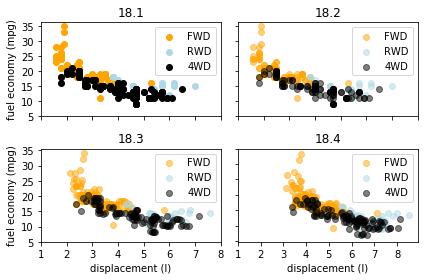

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import random

def getData():
    url = "https://raw.githubusercontent.com/pratoolbharti/NIU/master/Applied_Machine_Learning_S20/Homework-1/mpg.csv"
    response = requests.get(url, timeout=5)
    data = response.text.split("\n")
    del data[0]

    list = []
    for x in data:
        if len(x) > 0:
            list.append(getDict(x.replace("\"", "")))

    return list

def getDict(str):
    parts = str.split(",")

    thisdict = {
        "id"          : parts[0],
        "manufacturer": parts[1],
        "model"       : parts[2],
        "displacement": float(parts[3]),
        "year"        : float(parts[4]),
        "cylinder"    : float(parts[5]),
        "transmission": parts[6],
        "drive"       : parts[7],
        "city"        : float(parts[8]),
        "hwy"         : float(parts[9]),
        "fl"          : parts[10],
        "class"       : parts[11],
    }

    return thisdict

def getDataByDrive(data):

    fwd = []
    rwd = []
    fourwd = []

    for x in data:
        if x['drive'] == 'f':
            fwd.append(getCoordinateDict(x['displacement'], x['city']))
        elif x['drive'] == 'r':
            rwd.append(getCoordinateDict(x['displacement'], x['city']))
        else:
            fourwd.append(getCoordinateDict(x['displacement'], x['city']))

    driveData = {
        'fwd': fwd,
        'rwd': rwd,
        '4wd': fourwd
    }

    return driveData

def getCoordinateDict(x, y):
    point = {
        'x' : x,
        'y' : y
    }
    return point

def getRandFloat(min, max):
    return random.uniform(min, max)

def plotGraph1(axis):
    data = getData()
    dataByDrive = getDataByDrive(data)

    x = []
    y = []

    # plot fwd coordinates
    for item in dataByDrive['fwd']:
        x.append(item['x'])
        y.append(item['y'])

    axis.scatter(np.array(x), np.array(y), c='orange', label='FWD')


    x.clear()
    y.clear()

    # plot rwd coordinates
    for item in dataByDrive['rwd']:
        x.append(item['x'])
        y.append(item['y'])

    axis.scatter(np.array(x), np.array(y), c='lightblue', label='RWD')

    x.clear()
    y.clear()

    # plot 4wd coordinates
    for item in dataByDrive['4wd']:
        x.append(item['x'])
        y.append(item['y'])

    axis.scatter(np.array(x), np.array(y), c='black', label='4WD')
    axis.legend()

def plotGraph2(axis):
    data = getData()
    dataByDrive = getDataByDrive(data)

    x = []
    y = []

    # plot fwd coordinates
    for item in dataByDrive['fwd']:
        x.append(item['x'])
        y.append(item['y'])

    axis.scatter(np.array(x), np.array(y), c='orange', label='FWD', alpha=0.5)


    x.clear()
    y.clear()

    # plot rwd coordinates
    for item in dataByDrive['rwd']:
        x.append(item['x'])
        y.append(item['y'])

    axis.scatter(np.array(x), np.array(y), c='lightblue', label='RWD', alpha=0.5)

    x.clear()
    y.clear()

    # plot 4wd coordinates
    for item in dataByDrive['4wd']:
        x.append(item['x'])
        y.append(item['y'])

    axis.scatter(np.array(x), np.array(y), c='black', label='4WD', alpha=0.5)
    axis.legend()

def plotGraph3(axis):
    data = getData()
    dataByDrive = getDataByDrive(data)

    x = []
    y = []
    count = 0;

    jitterMin = 0.5
    jitterMax = 0.8

    # plot fwd coordinates
    for item in dataByDrive['fwd']:
        rand = getRandFloat(jitterMin, jitterMax)

        if count % 2 == 0:
            p = item['x'] + rand
            z = item['y'] - rand
        else:
            p = item['x'] - rand
            z = item['y'] + rand

        x.append(p)
        y.append(z)

    axis.scatter(np.array(x), np.array(y), c='orange', label='FWD', alpha=0.5)  # plot FWD graph


    x.clear()
    y.clear()

    # plot rwd coordinates
    for item in dataByDrive['rwd']:
        rand = getRandFloat(jitterMin, jitterMax)

        # is count even?
        if count % 2 == 0:
            p = item['x'] + rand
            z = item['y'] - rand
        else:
            p = item['x'] - rand
            z = item['y'] + rand

        x.append(p)
        y.append(z)

    axis.scatter(np.array(x), np.array(y), c='lightblue', label='RWD', alpha=0.5)

    x.clear()
    y.clear()

    # plot 4wd coordinates
    for item in dataByDrive['4wd']:
        rand = getRandFloat(jitterMin, jitterMax)

        # is count even?
        if count % 2 == 0:
            p = item['x'] + rand
            z = item['y'] - rand
        else:
            p = item['x'] - rand
            z = item['y'] + rand

        x.append(p)
        y.append(z)

    axis.scatter(np.array(x), np.array(y), c='black', label='4WD', alpha=0.5)
    axis.legend()

def plotGraph4(axis):
    data = getData()
    dataByDrive = getDataByDrive(data)

    x = []
    y = []
    count = 0;

    jitterMin = 1.5
    jitterMax = 2.0

    # plot fwd coordinates
    for item in dataByDrive['fwd']:
        rand = getRandFloat(jitterMin, jitterMax)

        if count % 2 == 0:
            p = item['x'] + getRandFloat(jitterMin, jitterMax)
            z = item['y'] - getRandFloat(jitterMin, jitterMax)
        else:
            p = item['x'] - getRandFloat(jitterMin, jitterMax)
            z = item['y'] + getRandFloat(jitterMin, jitterMax)

        x.append(p)
        y.append(z)

    axis.scatter(np.array(x), np.array(y), c='orange', label='FWD', alpha=0.5)


    x.clear()
    y.clear()

    # plot rwd coordinates
    for item in dataByDrive['rwd']:
        rand = getRandFloat(jitterMin, jitterMax)

        if count % 2 == 0:
            p = item['x'] + getRandFloat(jitterMin, jitterMax)
            z = item['y'] - getRandFloat(jitterMin, jitterMax)
        else:
            p = item['x'] - getRandFloat(jitterMin, jitterMax)
            z = item['y'] + getRandFloat(jitterMin, jitterMax)

        x.append(p)
        y.append(z)


    axis.scatter(np.array(x), np.array(y), c='lightblue', label='RWD', alpha=0.5)

    x.clear()
    y.clear()

    # plot 4wd coordinates
    for item in dataByDrive['4wd']:
        rand = getRandFloat(jitterMin, jitterMax)

        if count % 2 == 0:
            p = item['x'] + getRandFloat(jitterMin, jitterMax)
            z = item['y'] - getRandFloat(jitterMin, jitterMax)
        else:
            p = item['x'] - getRandFloat(jitterMin, jitterMax)
            z = item['y'] + getRandFloat(jitterMin, jitterMax)

        x.append(p)
        y.append(z)


    axis.scatter(np.array(x), np.array(y), c='black', label='4WD', alpha=0.5)
    axis.legend()

############################################################
#                          Main
############################################################

fig, axs = plt.subplots(2, 2)

# plot the 4 subplots
plotGraph1(axs[0, 0])
plotGraph2(axs[0, 1])
plotGraph3(axs[1, 0])
plotGraph4(axs[1, 1])

# set titles
axs[0,0].set_title('18.1')
axs[0,1].set_title('18.2')
axs[1,0].set_title('18.3')
axs[1,1].set_title('18.4')


xticks = [1, 2, 3, 4, 5, 6, 7, 8]
yticks = np.arange(5, 40, 5)

for ax in axs.flat:
    # set x and y axis labels and tick marks
    ax.set(xlabel='displacement (l)', ylabel='fuel economy (mpg)', xticks=xticks, yticks=yticks)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax.label_outer()

fig.tight_layout()
plt.show()

# eof
